# Highlighting the most popular machine learning algorithms; Implementing and comparing the accuracy

## Importing required libraries

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## loading data

In [17]:
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Data processing

In [19]:
def process_iris_data(x,y, Scaler, encoder, test_size=0.2):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)
  print({'x_train': x_train.shape, 'x_test': x_test.shape, 'y_train':y_train.shape, 'y_test':y_test.shape})
  x_train = Scaler.fit_transform(x_train) # StandardScaler
  x_test = Scaler.transform(x_test) # StandardScaler
  y_train = Le.fit_transform(y_train) # LabelEncoder
  y_test = Le.transform(y_test) # LabelEncoder
  return (x_train, x_test, y_train, y_test)

In [20]:
Sc = StandardScaler()
Le = LabelEncoder()
x = dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = dataset['Species'].values

x_train, x_test, y_train, y_test = process_iris_data(x,y,Sc,Le) # calling the function

{'x_train': (120, 4), 'x_test': (30, 4), 'y_train': (120,), 'y_test': (30,)}


#### Logistic Regression

This model is explained here: https://medium.com/@nafiu.dev/predicting-the-success-of-bank-telemarketing-using-logistic-regression-2bae00220912


Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression 
ler_model = LinearRegression() # creating the model
ler_model.fit(x_train, y_train) # training the model


ler_model.score(x_test,y_test) # checking model accuracy

0.9544536138367141

#### Support Vector Machine

In [22]:
from sklearn import svm
svm_model = svm.SVC() # creating the model
svm_model.fit(x_train, y_train) # training the model

# checking model accuracy
svm_model.score(x_test,y_test)

1.0

#### Decision Trees

In [23]:
from sklearn.tree import DecisionTreeClassifier

Dt_clf = DecisionTreeClassifier() # creating the model
Dt_clf.fit(x_train, y_train) # training the model

Dt_clf.score(x_test,y_test) # checking model accuracy

0.9666666666666667

#### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier() # creating the model
Rfc.fit(x_train, y_train) # training the model

# checking model accuracy
Rfc.score(x_test, y_test)

0.9666666666666667

#### Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()  # creating the model
gnb.fit(x_train, y_train) # training the model

# checking model accuracy
gnb.score(x_test, y_test)

0.9666666666666667

#### K-Means Clustering

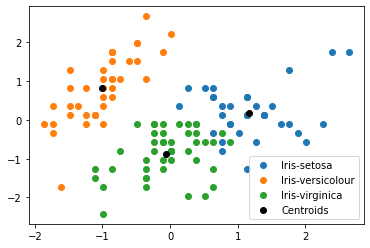

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0) # creating the model
kmeans.fit(x_train) # training the model
# making predictions
y_kmeans = kmeans.fit_predict(x_train) 

# plotting the results
plt.scatter(x_train[y_kmeans == 0, 0], x_train[y_kmeans == 0, 1],  label = 'Iris-setosa')
plt.scatter(x_train[y_kmeans == 1, 0], x_train[y_kmeans == 1, 1], label = 'Iris-versicolour')
plt.scatter(x_train[y_kmeans == 2, 0], x_train[y_kmeans == 2, 1], label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color="black", label = 'Centroids')

plt.legend();

#### K-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3) # creating the model
knn_clf.fit(x_train, y_train)  # training the model


y_pred_knn = knn_clf.predict(x_test) # making predictions
accuracy_score(y_test, y_pred_knn) # checking accuracy score

1.0

In [28]:
# End